# Pandas
시리즈(Series)의 데이터 타입을 잘 정의 할 것

=> object형으로 되는 경우가 많음으로 원하는 타입으로 변화를 잘 시켜야함

## Series

In [4]:
import pandas as pd

#k:v 구조를 갖는 딕셔너리를 만들고, 변수 dict_data에 저장
dic_data = {'a':1, 'b':2, 'c':3}

#판다스 Series() 함수로 딕셔너리(dict_data)를 시리즈로 변환
sr = pd.Series(dic_data)

#변수 sr의 자료형 출력
print(type(sr))
print('\n')

#변수 sr에 저장되어 있는 시리즈 객체를출력
print(sr)

<class 'pandas.core.series.Series'>


a    1
b    2
c    3
dtype: int64


In [7]:
#리스트를 시리즈로 변환 하여 변수 sr에 저장
list_data = ['2019-01-02', 3.14, 'ABC', 100, True]
sr=pd.Series(list_data)
print(sr)
print('\n')

#인덱스 배열은 변수 idx에 저장. 데이터 값 배열은 변수 val에 저장
idx=sr.index
val=sr.values
print(idx)
print('\n')
print(val)

0    2019-01-02
1          3.14
2           ABC
3           100
4          True
dtype: object


RangeIndex(start=0, stop=5, step=1)


['2019-01-02' 3.14 'ABC' 100 True]


In [9]:
import pandas as pd

# 투플을 시리즈로 변환(index 옵션에 인덱스 이름을 지정)
tup_data = ('영인', '2010-05-01', '여', True)
sr = pd.Series(tup_data, index=['이름', '생년월일', '성별', '학생여부'])
print(sr)

이름              영인
생년월일    2010-05-01
성별               여
학생여부          True
dtype: object


In [10]:
# 원소를 1개 선택
print(sr[0]) # sr의 1 번째 원소를 선택 (정수형 위치 인덱스를 활용)
print(sr['이름']) # '이름' 라벨을 가진 원소를 선택 (인덱스 이름을 활용)

영인
영인


In [25]:
# 여러 개의 원소를 선택 (인덱스 리스트 활용) => 2개의 값을 하나의 리스트로 묶음
print(sr[[1,2]])
print(sr[['생년월일','성별']])

생년월일    2010-05-01
성별               여
dtype: object
생년월일    2010-05-01
성별               여
dtype: object


In [23]:
# 여러 개의 원소를 선택 (인덱스 범위 지정)
print(sr[1 : 2])
print(sr['생년월일' : '성별']) 

생년월일    2010-05-01
dtype: object
생년월일    2010-05-01
성별               여
dtype: object


## DataFrame

In [26]:
# 열이름을 key로 하고, 리스트를 value로 갖는 딕셔너리 정의(2차원 배열)
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 
            'c3':[10,11,12], 'c4':[13,14,15]}

#판다스 DataFrame() 함수로 딕셔너리를 데이터프레임으로 변환, 변수 df에 저장
df = pd.DataFrame(dict_data)

#df의 자료형 출력
print(type(df))
print('\n')

#변수 df에 저장되어 있는 데이터프레임 객체를 출력
print(df)

<class 'pandas.core.frame.DataFrame'>


   c0  c1  c2  c3  c4
0   1   4   7  10  13
1   2   5   8  11  14
2   3   6   9  12  15


dict형태는 key를 열 이름으로 갖는 Series로 생성

하나의 리스트는 하나의 열로 들어간다

pd.DataFrame(배열, index=행 인덱스 배열, columns=열 이름 배열)

In [4]:
import pandas as pd
df = pd.DataFrame([[15, '남', '덕영중'], [17, '여', '수리중']],
                 index=['준서','예은'],
                 columns=['나이', '성별', '학교'])
print(df)

    나이 성별   학교
준서  15  남  덕영중
예은  17  여  수리중


In [6]:
# 열 이름 중, '나이'를 '연령'으로, '성별'을 '남녀'로, '학교'를 소속으로 바꾸기
# inplace는 변수에 바로 적용을 할 것인지 아닌지를 적용함. default 값은 False
df.rename(columns={'나이':'연령', '성별':'남녀', '학교':'소속'}, inplace=True)
print(df)

    연령 남녀   소속
준서  15  남  덕영중
예은  17  여  수리중


In [13]:
#DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장
exam_data = {'수학' : [90, 80, 70], '영어':[98, 89, 95],
            '음악':[85, 95, 100], '체육' : [100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
print(df)

    수학  영어   음악   체육
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90


In [16]:
df2 = df[:]
df2.drop('우현', inplace=True)
print(df2)

    수학  영어   음악   체육
서준  90  98   85  100
인아  70  95  100   90


C:\Users\aa\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
# axis가 0이면 행 삭제, 1이면 열 삭제
df3 = df[:]
df3.drop(['우현', '인아'], axis=0, inplace=True)
print(df3)

    수학  영어  음악   체육
서준  90  98  85  100


C:\Users\aa\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
# 행 접근(loc, iloc) / 열접근(df['열 이름'])
print(df.loc['서준']) #loc는 키 값으로
print('\n')
print(df.iloc[0]) #iloc는 인덱스 값으로

수학     90
영어     98
음악     85
체육    100
Name: 서준, dtype: int64


수학     90
영어     98
음악     85
체육    100
Name: 서준, dtype: int64


In [27]:
exam_data = {'이름' : [ '서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)
print(df)

   이름  수학  영어   음악   체육
0  서준  90  98   85  100
1  우현  80  89   95   90
2  인아  70  95  100   90


In [29]:
df

,이름,수학,영어,음악,체육
0,서준,90,98,85,100
1,우현,80,89,95,90
2,인아,70,95,100,90


In [30]:
df.set_index('이름', inplace=True)
df

,수학,영어,음악,체육
이름,,,,
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [33]:
df['총점'] = df['수학']+df['영어']
df

,수학,영어,음악,체육,총점
이름,,,,,
서준,90,98,85,100,188
우현,80,89,95,90,169
인아,70,95,100,90,165


In [35]:
# 데이터를 불러오면 가장 먼저 해야하는 기본
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 서준 to 인아
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   수학      3 non-null      int64
 1   영어      3 non-null      int64
 2   음악      3 non-null      int64
 3   체육      3 non-null      int64
 4   총점      3 non-null      int64
dtypes: int64(5)
memory usage: 144.0+ bytes


In [39]:
df['평균'] = 0
df

,수학,영어,음악,체육,총점,평균
이름,,,,,,
서준,90,98,85,100,188,0
우현,80,89,95,90,169,0
인아,70,95,100,90,165,0


In [43]:
df.loc['길동'] = [80, 90, 70, 60, 170, 0]
df

,수학,영어,음악,체육,총점,평균
이름,,,,,,
서준,90,98,85,100,188,0
우현,80,89,95,90,169,0
인아,70,95,100,90,165,0
길동,80,90,70,60,170,0


In [51]:
#행열 변환
df.T

이름,서준,우현,인아,길동
수학,90,80,70,80
영어,98,89,95,90
음악,85,95,100,70
체육,100,90,90,60
총점,188,169,165,170
평균,0,0,0,0


In [52]:
df

,수학,영어,음악,체육,총점,평균
이름,,,,,,
서준,90,98,85,100,188,0
우현,80,89,95,90,169,0
인아,70,95,100,90,165,0
길동,80,90,70,60,170,0


In [53]:
exam_data = {'수학' : [90, 80, 70],
             '영어' : [98, 89, 95],
             '음악' : [85, 95, 100],
             '체육' : [100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])

df['총점'] = df['수학'] + df['영어'] + df['음악'] + df['체육']
df['평균'] = df['총점']/4
df

,수학,영어,음악,체육,총점,평균
서준,90,98,85,100,373,93.25
우현,80,89,95,90,354,88.50
인아,70,95,100,90,355,88.75


In [54]:
for row in df['평균'] :
    print(row)

93.25
88.5
88.75


In [64]:
for row in range(len(df['평균'])) :
    if df['평균'][row] >= 90 :
        df['합격'][row] = '합격'
    else :
        df['합격'][row] = '불합격'

df

<ipython-input-64-f0d42a2f246a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['합격'][row] = '합격'
<ipython-input-64-f0d42a2f246a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['합격'][row] = '불합격'


,수학,영어,음악,체육,총점,평균,합격
서준,90,98,85,100,373,93.25,합격
우현,80,89,95,90,354,88.50,불합격
인아,70,95,100,90,355,88.75,불합격


* apply() : 함수를 각 열이나 행에 적용을 한다.

In [70]:
def scholarship(row) :
    if row == '합격' :
        return '장학생'
    else :
        return '비장학생'

In [71]:
df['장학'] = 0
df.장학 = df.합격.apply(scholarship)
df

,수학,영어,음악,체육,총점,평균,합격,장학
서준,90,98,85,100,373,93.25,합격,장학생
우현,80,89,95,90,354,88.50,불합격,비장학생
인아,70,95,100,90,355,88.75,불합격,비장학생


In [76]:
file_path = 'csv_sample.csv'

# read_csv() 함수로 데이터프레임 변한, 변수 df1에 저장
df1 = pd.read_csv(file_path)
print(df1)
print('\n')

#header=None 옵션
df2=pd.read_csv(file_path, header=None)
print(df2)
print('\n')

#index_col=None 옵션
df3 = pd.read_csv(file_path, index_col=None)
print(df3)
print('\n')

#index_col='c0' 옵션
df4 = pd.read_csv(file_path, index_col='c0')
print(df4)

   c0  c1  c2  c3
0   0   1   4   7
1   1   2   5   8
2   2   3   6   9


    0   1   2   3
0  c0  c1  c2  c3
1   0   1   4   7
2   1   2   5   8
3   2   3   6   9


   c0  c1  c2  c3
0   0   1   4   7
1   1   2   5   8
2   2   3   6   9


    c1  c2  c3
c0            
0    1   4   7
1    2   5   8
2    3   6   9


In [79]:
data = {'name':{'pandas':'', 'NumPy':'', 'matplotlib':''},
       'year':{'pandas':2008,'NumPy':2006, 'matplotlib':2003},
       'developer':{'pandas':'Wes Mckinneye', 'NumPy':'Travis Oliphant', 'matplotlib':'John D.Hunter'},
       'opensource':{'pandas':'True', 'NumPy':'True', 'matplotlib':'True'}}

df99 = pd.DataFrame(data)
df99

,name,year,developer,opensource
pandas,,2008,Wes Mckinneye,True
NumPy,,2006,Travis Oliphant,True
matplotlib,,2003,John D.Hunter,True


In [83]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

# 위키피디아 미국 ETF 웹 페이지에서 필요한 정보를 스크래핑하여 딕셔너리 형태로 변수 etfs에 저장
url = "https://en.wikipedia.org/wiki/List_of_American_exchange-traded_funds"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'lxml')
rows = soup.select('div > ul > li')
etfs = {}

for row in rows:
    try:
        etf_name = re.findall('^(.*) \(NYSE', row.text)
        etf_market = re.findall('\((.*)\|', row.text)
        etf_ticker = re.findall('NYSE Arca\|(.*)\)', row.text)
        if (len(etf_ticker) > 0) & (len(etf_market) > 0) & (len(etf_name) > 0):
            etfs[etf_ticker[0]] = [etf_market[0], etf_name[0]]
    except AttributeError as err:
        pass
# etfs 딕셔너리 출력
print(etfs)
print('\n')

# etfs 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame(etfs)
df.head(2)

{'DIA': ['NYSE Arca', 'DIAMONDS Trust, Series 1'], 'RSP': ['NYSE Arca', 'Guggenheim S&P 500 Equal Weight'], 'IOO': ['NYSE Arca', 'iShares S&P Global 100 Index'], 'IVV': ['NYSE Arca', 'iShares S&P 500 Index'], 'SPY': ['NYSE Arca', 'SPDR S&P 500'], 'VOO': ['NYSE Arca', 'Vanguard S&P 500'], 'IWM': ['NYSE Arca', 'iShares Russell 2000 Index'], 'OEF': ['NYSE Arca', 'iShares S&P 100 Index'], 'CVY': ['NYSE Arca', 'Guggenheim Multi-Asset Income'], 'RPG': ['NYSE Arca', 'Guggenheim S&P 500 Pure Growth ETF'], 'RPV': ['NYSE Arca', 'Guggenheim S&P 500 Pure Value ETF'], 'IWB': ['NYSE Arca', 'iShares Russell 1000 Index'], 'PKW': ['NYSE Arca', 'PowerShares Buyback Achievers'], 'PRF': ['NYSE Arca', 'PowerShares FTSE RAFI US 1000'], 'SPLV': ['NYSE Arca', 'PowerShares S&P 500 Low Volatility'], 'SCHX': ['NYSE Arca', 'Schwab US Large-Cap ETF'], 'SCHD': ['NYSE Arca', 'Schwab US Dividend Equity ETF'], 'FNDX': ['NYSE Arca', 'Schwab Fundamental U.S. Large Company Index ETF'], 'SDY': ['NYSE Arca', 'SPDR S&P Divi

,DIA,RSP,IOO,IVV,SPY,VOO,IWM,OEF,CVY,RPG,...,CEW,CRDT,CYB,ELD,EMCB,EU,ICB,RRF,USDU,WDTI
0,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,...,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca,NYSE Arca
1,"DIAMONDS Trust, Series 1",Guggenheim S&P 500 Equal Weight,iShares S&P Global 100 Index,iShares S&P 500 Index,SPDR S&P 500,Vanguard S&P 500,iShares Russell 2000 Index,iShares S&P 100 Index,Guggenheim Multi-Asset Income,Guggenheim S&P 500 Pure Growth ETF,...,WisdomTree Dreyfus Emerging Currency,WisdomTree Strategic Corporate Bond Fund,WisdomTree Dreyfus Chinese Yuan,WisdomTree Emerging Markets Local Debts Fund,WisdomTree Emerging Markets Corporate Bond Fund,WisdomTree Euro Debt Fund,WisdomTree Dreyfus Indian Rupee,WisdomTree Global Real Return,WisdomTree Bloomberg U.S. Dollar Bullish Fund,WisdomTree Managed Futures Strategy Fund


In [87]:
exam_data = {'수학' : [90, 80, 70],
             '영어' : [98, 89, 95],
             '음악' : [85, 95, 100],
             '체육' : [100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])

df['총점'] = df['수학'] + df['영어'] + df['음악'] + df['체육']
df['평균'] = df['총점']/4
df

,수학,영어,음악,체육,총점,평균
서준,90,98,85,100,373,93.25
우현,80,89,95,90,354,88.50
인아,70,95,100,90,355,88.75


In [90]:
df['합격'] = None
for row in range(len(df['평균'])) :
    if df['평균'][row] >= 90 :
        df['합격'][row] = '합격'
    else :
        df['합격'][row] = '불합격'

df

<ipython-input-90-06fdabc7c38c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['합격'][row] = '합격'
<ipython-input-90-06fdabc7c38c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['합격'][row] = '불합격'


,수학,영어,음악,체육,총점,평균,합격
서준,90,98,85,100,373,93.25,합격
우현,80,89,95,90,354,88.50,불합격
인아,70,95,100,90,355,88.75,불합격


* apply() : 함수를 각 열이나 행에 적용을 한다.

In [91]:
def scholarship(row) :
    if row == '합격' :
        return '장학생'
    else :
        return '비장학생'

In [92]:
df['장학'] = 0
df.장학 = df.합격.apply(scholarship)
df

,수학,영어,음악,체육,총점,평균,합격,장학
서준,90,98,85,100,373,93.25,합격,장학생
우현,80,89,95,90,354,88.50,불합격,비장학생
인아,70,95,100,90,355,88.75,불합격,비장학생


In [93]:
df.to_csv('test0630.csv')

In [94]:
df.to_excel('test0630.xlsx')

In [111]:
df = pd.read_csv('data/auto-mpg.csv', header=None)

df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [112]:
df.columns = ['mpg','cylinders','displacement',
              'horsepower','weight', 'acceleration',
              'model year','origin','name']


In [114]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [115]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [116]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [120]:
df.shape

(398, 9)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [119]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'name'],
      dtype='object')

In [118]:
#데이터프레임의 기술 통계 정보 확인
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [121]:
# 값들의 개수 확인
unique_values = df['origin'].value_counts()
unique_values

1    249
3     79
2     70
Name: origin, dtype: int64

In [122]:
# 값들의 집합
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [123]:
#상관 계수 파악 -1~1, A가 증가할때 B가 증가하면 상관 계수가 높다.
#>0.3 약한 상관관계, >0.7 강한 상관관계

df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


### 필터링

In [124]:
df[df.mpg>40]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
244,43.1,4,90.0,48.00,1985.0,21.5,78,2,volkswagen rabbit custom diesel
309,41.5,4,98.0,76.00,2144.0,14.7,80,2,vw rabbit
322,46.6,4,86.0,65.00,2110.0,17.9,80,3,mazda glc
324,40.8,4,85.0,65.00,2110.0,19.2,80,3,datsun 210
325,44.3,4,90.0,48.00,2085.0,21.7,80,2,vw rabbit c (diesel)
326,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)
329,44.6,4,91.0,67.00,1850.0,13.8,80,3,honda civic 1500 gl
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup


In [125]:
df.query('mpg>40')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
244,43.1,4,90.0,48.00,1985.0,21.5,78,2,volkswagen rabbit custom diesel
309,41.5,4,98.0,76.00,2144.0,14.7,80,2,vw rabbit
322,46.6,4,86.0,65.00,2110.0,17.9,80,3,mazda glc
324,40.8,4,85.0,65.00,2110.0,19.2,80,3,datsun 210
325,44.3,4,90.0,48.00,2085.0,21.7,80,2,vw rabbit c (diesel)
326,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)
329,44.6,4,91.0,67.00,1850.0,13.8,80,3,honda civic 1500 gl
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup


In [127]:
df[(df.mpg>40) & (df.weight>2300)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
326,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)


In [128]:
df.filter(like='m', axis=1)

,mpg,displacement,model year,name
0,18.0,307.0,70,chevrolet chevelle malibu
1,15.0,350.0,70,buick skylark 320
2,18.0,318.0,70,plymouth satellite
3,16.0,304.0,70,amc rebel sst
4,17.0,302.0,70,ford torino
...,...,...,...,...
393,27.0,140.0,82,ford mustang gl
394,44.0,97.0,82,vw pickup
395,32.0,135.0,82,dodge rampage
396,28.0,120.0,82,ford ranger


In [129]:
# n$ => n으로 끝나는
df.filter(regex='n$', axis=1)

,acceleration,origin
0,12.0,1
1,11.5,1
2,11.0,1
3,12.0,1
4,10.5,1
...,...,...
393,15.6,1
394,24.6,2
395,11.6,1
396,18.6,1


In [130]:
import pandas as pd
# ^m => m으로 시작하는
df.filter(regex='^m', axis=1)

,mpg,model year
0,18.0,70
1,15.0,70
2,18.0,70
3,16.0,70
4,17.0,70
...,...,...
393,27.0,82
394,44.0,82
395,32.0,82
396,28.0,82


In [135]:
df_groupby=df.groupby(by=['model year'])

In [134]:
import pandas as pd

df_groupby=df.groupby(by=['model year'])
df_groupby.groups

{70: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], 71: [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56], 72: [57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84], 73: [85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124], 74: [125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151], 75: [152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181], 76: [182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213

In [132]:
for year, group in df_groupby:
    print(year, "년: ", len(group))
    print(group)
    print()

70 년:  29
     mpg  cylinders  displacement horsepower  weight  acceleration  \
0   18.0          8         307.0      130.0  3504.0          12.0   
1   15.0          8         350.0      165.0  3693.0          11.5   
2   18.0          8         318.0      150.0  3436.0          11.0   
3   16.0          8         304.0      150.0  3433.0          12.0   
4   17.0          8         302.0      140.0  3449.0          10.5   
5   15.0          8         429.0      198.0  4341.0          10.0   
6   14.0          8         454.0      220.0  4354.0           9.0   
7   14.0          8         440.0      215.0  4312.0           8.5   
8   14.0          8         455.0      225.0  4425.0          10.0   
9   15.0          8         390.0      190.0  3850.0           8.5   
10  15.0          8         383.0      170.0  3563.0          10.0   
11  14.0          8         340.0      160.0  3609.0           8.0   
12  15.0          8         400.0      150.0  3761.0           9.5   
13  14.0  

In [133]:
df.groupby(by=['model year']).count()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
model year,,,,,,,,
70,29,29,29,29,29,29,29,29
71,28,28,28,28,28,28,28,28
72,28,28,28,28,28,28,28,28
73,40,40,40,40,40,40,40,40
74,27,27,27,27,27,27,27,27
75,30,30,30,30,30,30,30,30
76,34,34,34,34,34,34,34,34
77,28,28,28,28,28,28,28,28
78,36,36,36,36,36,36,36,36


## Titanic Data Set 실습

In [153]:
# titanic 데이터셋 가져오기
df = pd.read_csv('data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [139]:
df.shape

(891, 12)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [141]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [142]:
#결측치 확인
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


* NaN 처리 방법

    - 데이터에서 삭제(dropna 함수 사용)
    - 다른 값으로 치환(fillna 함수 사용)

In [144]:
df[df['Age'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [207]:
# 전체 나이의 평균으로 대체
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [159]:
# 생존자 나이 평균
mean1 = df[df['Survived'] == 1]['Age'].mean()

# 사망자 나이 평균
mean0 = df[df['Survived'] == 0]['Age'].mean()

print(mean1, mean0)

28.343689655172415 30.62617924528302


In [184]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [196]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [206]:
df.loc[df['Survived'] == 1, 'Age'] = df[df['Survived'] == 1]['Age'].fillna(mean1)
df.loc[df['Survived'] == 0, 'Age'] = df[df['Survived'] == 0]['Age'].fillna(mean0)

52
125


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [164]:
df.set_index('PassengerId', inplace=True)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [168]:
df1 = pd.read_csv('data/titanic.csv', index_col='PassengerId', usecols=['PassengerId', 'Survived', 'Pclass', 'Name'])
df1

,Survived,Pclass,Name
PassengerId,,,
1,0,3,"Braund, Mr. Owen Harris"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,3,"Heikkinen, Miss. Laina"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,0,3,"Allen, Mr. William Henry"
...,...,...,...
887,0,2,"Montvila, Rev. Juozas"
888,1,1,"Graham, Miss. Margaret Edith"
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie"""


In [171]:
class_ = df['Pclass'] == 1
age_ = (df['Age'] >=30) & (df['Age'] < 40)

df[class_ & age_]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S


In [172]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [173]:
class_group = df.groupby('Pclass')
class_group

In [174]:
class_group.groups

{1: [2, 4, 7, 12, 24, 28, 31, 32, 35, 36, 53, 55, 56, 62, 63, 65, 84, 89, 93, 97, 98, 103, 111, 119, 125, 137, 138, 140, 152, 156, 167, 169, 171, 175, 178, 186, 188, 195, 196, 210, 216, 219, 225, 231, 246, 249, 253, 257, 258, 259, 263, 264, 269, 270, 271, 274, 276, 285, 291, 292, 296, 298, 299, 300, 306, 307, 308, 310, 311, 312, 319, 320, 326, 330, 332, 333, 335, 337, 338, 340, 342, 352, 357, 367, 370, 371, 374, 376, 378, 381, 384, 391, 394, 413, 431, 435, 436, 439, 446, 448, ...], 2: [10, 16, 18, 21, 22, 34, 42, 44, 54, 57, 59, 67, 71, 73, 79, 85, 99, 100, 118, 121, 123, 124, 134, 135, 136, 145, 146, 149, 150, 151, 162, 179, 182, 184, 191, 192, 194, 200, 212, 214, 218, 220, 222, 227, 229, 233, 235, 237, 238, 239, 240, 243, 248, 250, 260, 266, 273, 278, 289, 293, 304, 309, 313, 315, 317, 318, 323, 324, 328, 341, 343, 344, 345, 346, 347, 358, 362, 386, 388, 390, 398, 399, 400, 406, 408, 414, 417, 418, 419, 427, 428, 433, 438, 440, 441, 444, 447, 451, 459, 464, ...], 3: [1, 3, 5, 6, 8, 9

In [175]:
gender_group = df.groupby('Sex')
gender_group.groups

{'female': [2, 3, 4, 9, 10, 11, 12, 15, 16, 19, 20, 23, 25, 26, 29, 32, 33, 39, 40, 41, 42, 44, 45, 48, 50, 53, 54, 57, 59, 62, 67, 69, 72, 80, 83, 85, 86, 89, 99, 101, 107, 110, 112, 114, 115, 120, 124, 129, 133, 134, 137, 141, 142, 143, 148, 152, 157, 162, 167, 168, 173, 178, 181, 185, 187, 191, 193, 195, 196, 199, 200, 206, 209, 212, 216, 217, 219, 230, 231, 234, 236, 238, 241, 242, 247, 248, 252, 255, 256, 257, 258, 259, 260, 265, 269, 270, 273, 275, 276, 277, ...], 'male': [1, 5, 6, 7, 8, 13, 14, 17, 18, 21, 22, 24, 27, 28, 30, 31, 34, 35, 36, 37, 38, 43, 46, 47, 49, 51, 52, 55, 56, 58, 60, 61, 63, 64, 65, 66, 68, 70, 71, 73, 74, 75, 76, 77, 78, 79, 81, 82, 84, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 102, 103, 104, 105, 106, 108, 109, 111, 113, 116, 117, 118, 119, 121, 122, 123, 125, 126, 127, 128, 130, 131, 132, 135, 136, 138, 139, 140, 144, 145, 146, 147, 149, 150, 151, 153, 154, 155, 156, ...]}

## 데이터 시각화

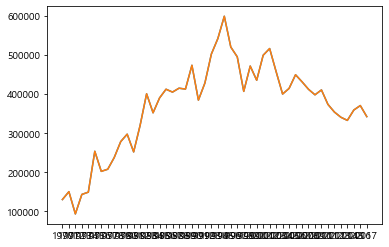

In [217]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/시도별 전출입 인구수.xlsx')
df = df.fillna(method='ffill') #누락값(NaN)을 앞 데이터로 채움

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

plt.plot(sr_one.index, sr_one.values) # x, y축 데이터를 plot 함수에 입력

plt.plot(sr_one) # 판다스 객체를 plot 함수에 입력

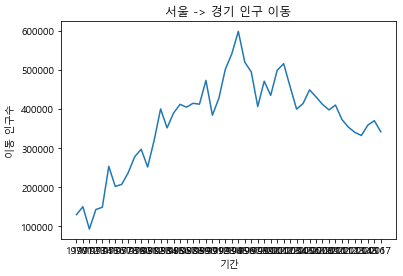

In [218]:
plt.plot(sr_one) # 판다스 객체를 plot 함수에 입력

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show() # 변경사항 저장하고 그래프 출력

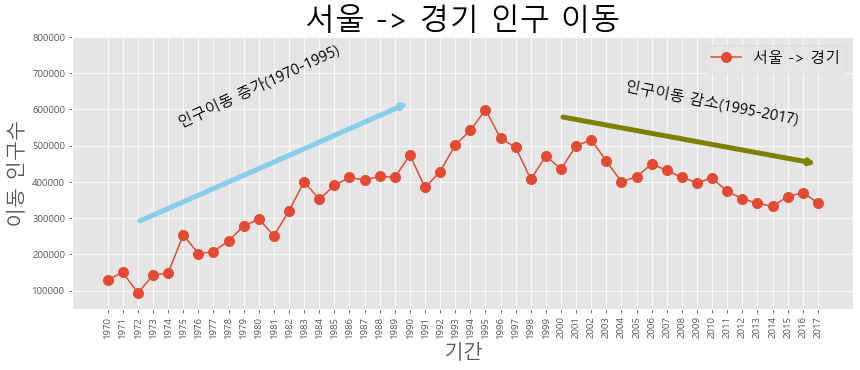

In [231]:
sr_one = df_seoul.loc['경기도']

plt.style.use('ggplot') # 스타일 서식 지정

plt.figure(figsize=(14, 5))

plt.xticks(size=10, rotation='vertical')
# 마커 표시 추가
plt.plot(sr_one, marker='o', markersize=10)

plt.title('서울 -> 경기 인구 이동', size=30) #차트 제목
plt.xlabel('기간', size=20) #x축 이름
plt.ylabel('이동 인구수', size=20) #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)
# plt.show()

# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)
    # 주석 표시 - 화살표
    
plt.annotate('',
        xy=(20, 620000), #화살표의 머리 부분(끝점)
        xytext=(2, 290000), #화살표의 꼬리 부분(시작점)
        xycoords='data', #좌표체계
        arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), #화살표서식
        )
    
plt.annotate('',
        xy=(47, 450000), #화살표의 머리 부분(끝점)
        xytext=(30, 580000), #화살표의 꼬리 부분(시작점)
        xycoords='data', #좌표체계
        arrowprops=dict(arrowstyle='->', color='olive', lw=5), #화살표서식
        )
# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)', #텍스트 입력
        xy=(10, 550000), #텍스트 위치 기준점
        rotation=25, #텍스트 회전각도
        va='baseline', #텍스트 상하 정렬
        ha='center', #텍스트 좌우 정렬
        fontsize=15, #텍스트 크기
        )
plt.annotate('인구이동 감소(1995-2017)', #텍스트 입력
        xy=(40, 560000), #텍스트 위치 기준점
        rotation=-11, #텍스트 회전각도
        va='baseline', #텍스트 상하 정렬
        ha='center', #텍스트 좌우 정렬
        fontsize=15, #텍스트 크기
        )

plt.show() # 변경사항 저장하고 그래프 출력


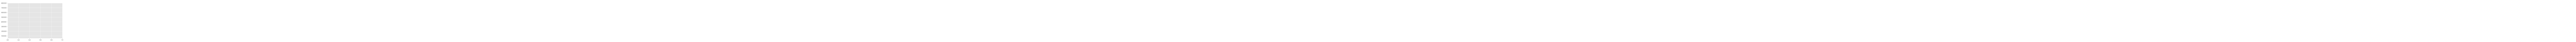

In [230]:
# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)
    # 주석 표시 - 화살표
    
plt.annotate('',
        xy=(20, 620000), #화살표의 머리 부분(끝점)
        xytext=(2, 290000), #화살표의 꼬리 부분(시작점)
        xycoords='data', #좌표체계
        arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), #화살표서식
        )
    
plt.annotate('',
        xy=(47, 450000), #화살표의 머리 부분(끝점)
        xytext=(30, 580000), #화살표의 꼬리 부분(시작점)
        xycoords='data', #좌표체계
        arrowprops=dict(arrowstyle='->', color='olive', lw=5), #화살표서식
        )
# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)', #텍스트 입력
        xy=(10, 550000), #텍스트 위치 기준점
        rotation=25, #텍스트 회전각도
        va='baseline', #텍스트 상하 정렬
        ha='center', #텍스트 좌우 정렬
        fontsize=15, #텍스트 크기
        )
plt.annotate('인구이동 감소(1995-2017)', #텍스트 입력
        xy=(40, 560000), #텍스트 위치 기준점
        rotation=-11, #텍스트 회전각도
        va='baseline', #텍스트 상하 정렬
        ha='center', #텍스트 좌우 정렬
        fontsize=15, #텍스트 크기
        )

plt.show() # 변경사항 저장하고 그래프 출력

<ipython-input-228-722f16c395af>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
<ipython-input-228-722f16c395af>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


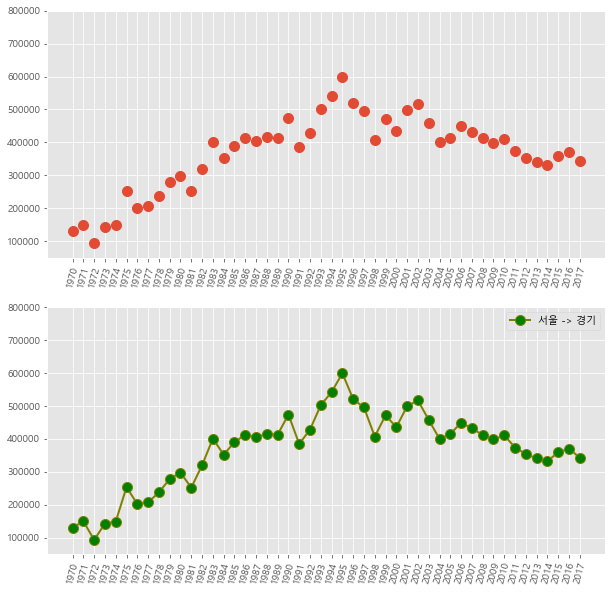

In [228]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2,
        label='서울 -> 경기')
ax2.legend(loc='best')

#y축 범위 지정 (최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show() # 변경사항 저장하고 그래프 출력

<ipython-input-229-aa012c5db9b8>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
<ipython-input-229-aa012c5db9b8>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
<ipython-input-229-aa012c5db9b8>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
<ipython-input-229-aa012c5db9b8>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


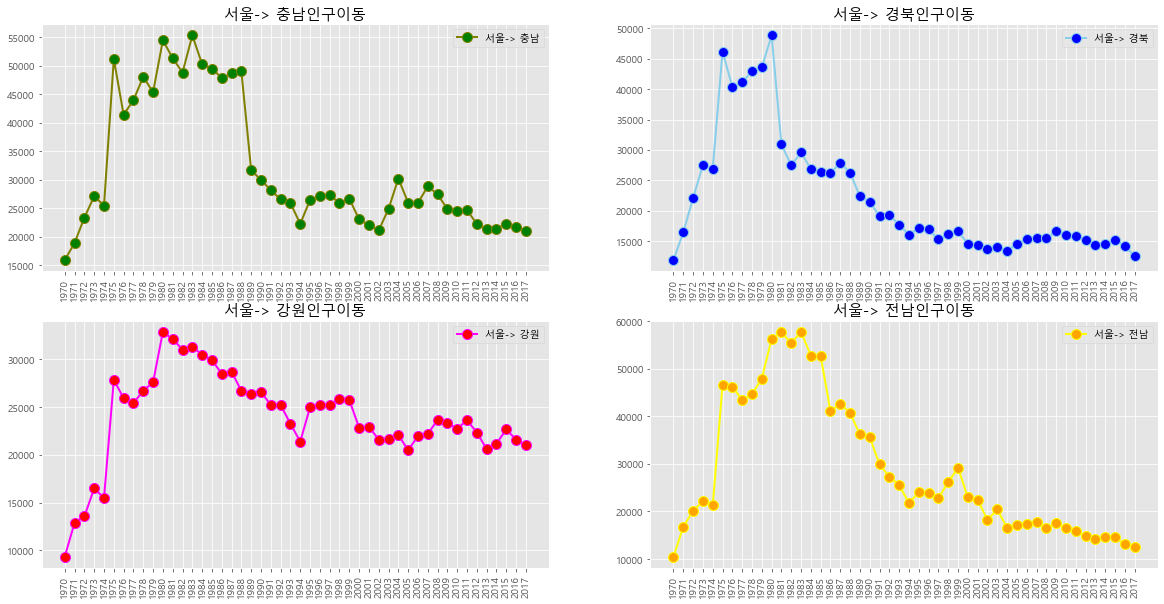

In [229]:
# 서울에서'충청남도','경상북도', '강원도', '전라남도'로이동한인구데이터값만선택
col_years= list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

plt.style.use('ggplot') # 스타일서식지정

# 그래프객체생성(figure에1개의서브플롯을생성)
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에plot 함수로그래프출력
ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green',
markersize=10, color='olive', linewidth=2, label='서울-> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue',
markersize=10, color='skyblue', linewidth=2, label='서울-> 경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red',
markersize=10, color='magenta', linewidth=2, label='서울-> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange',
markersize=10, color='yellow', linewidth=2, label='서울-> 전남')

# 범례표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트제목추가
ax1.set_title('서울-> 충남인구이동', size=15)
ax2.set_title('서울-> 경북인구이동', size=15)
ax3.set_title('서울-> 강원인구이동', size=15)
ax4.set_title('서울-> 전남인구이동', size=15)

# 축눈금라벨지정및90도회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show() # 변경사항저장하고그래프출력

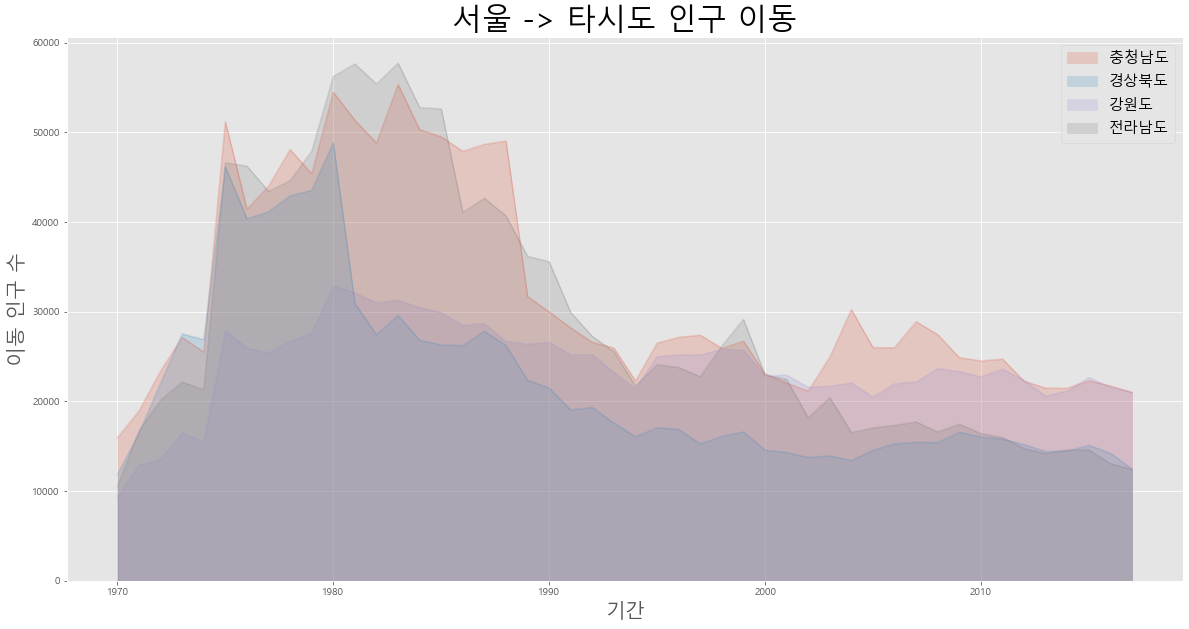

In [232]:
# 서울에서'충청남도','경상북도', '강원도', '전라남도'로이동한인구데이터값만선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()


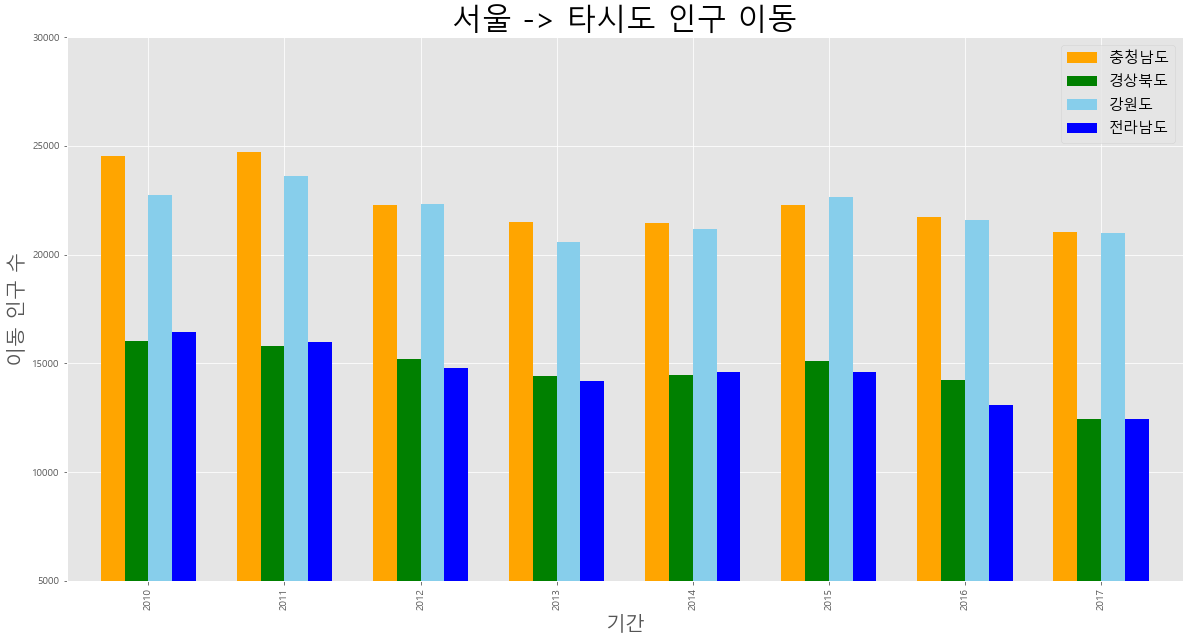

In [233]:
# 서울에서'충청남도','경상북도', '강원도', '전라남도'로이동한인구데이터값만선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()
plt.style.use('ggplot') # 스타일 서식 지정
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind='bar', figsize=(20, 10), width=0.7,
    color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

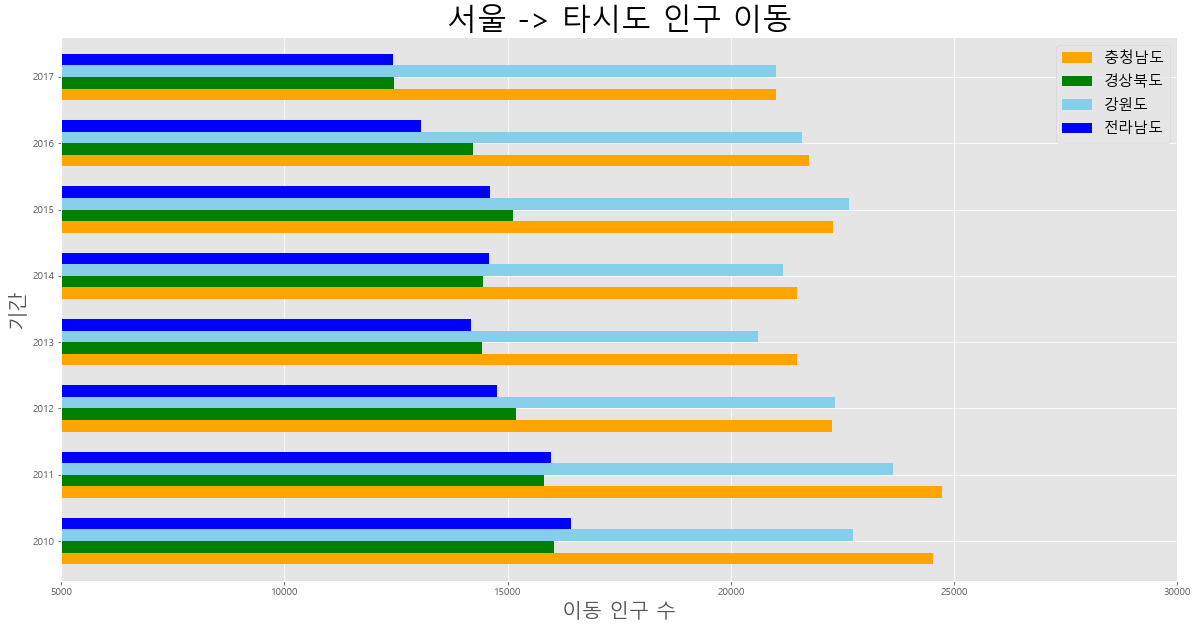

In [235]:
# 서울에서'충청남도','경상북도', '강원도', '전라남도'로이동한인구데이터값만선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()
plt.style.use('ggplot') # 스타일 서식 지정
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind='barh', figsize=(20, 10), width=0.7,
    color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.xlabel('이동 인구 수', size=20)
plt.ylabel('기간', size=20)
plt.xlim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

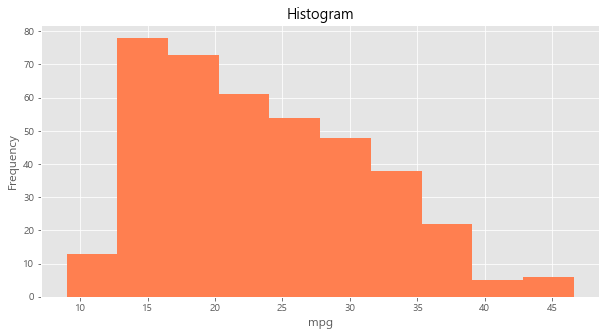

In [236]:
df = pd.read_csv('data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
    'acceleration','model year','origin','name']

# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

# 그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

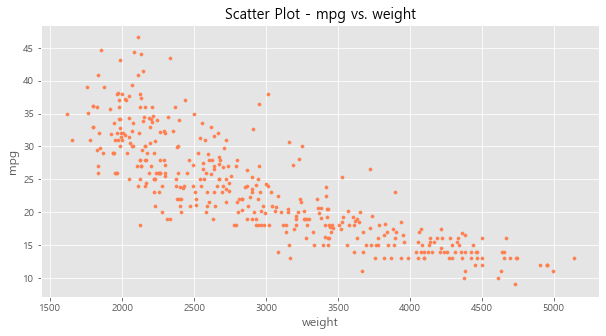

In [237]:
df = pd.read_csv('data/auto-mpg.csv', header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight',
    'acceleration','model year','origin','name']

# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot - mpg vs. weight')
plt.show()

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


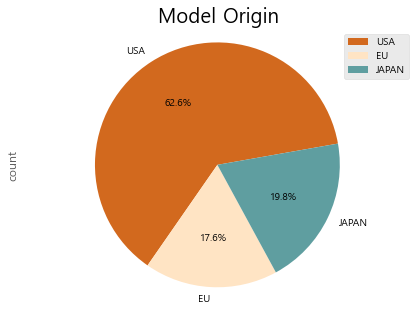

In [238]:
# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum() # origin 열을기준으로그룹화, 합계연산
print(df_origin.head()) # 그룹 연산 결과 출력

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin['count'].plot(kind='pie', figsize=(7, 5),
    autopct='%1.1f%%', # 퍼센트 % 표시
    startangle=10, # 파이 조각을 나누는 시작점(각도 표시)
    colors=['chocolate', 'bisque', 'cadetblue'] # 색상 리스트
    )

plt.title('Model Origin', size=20)
plt.axis('equal') # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right') # 범례 표시
plt.show()

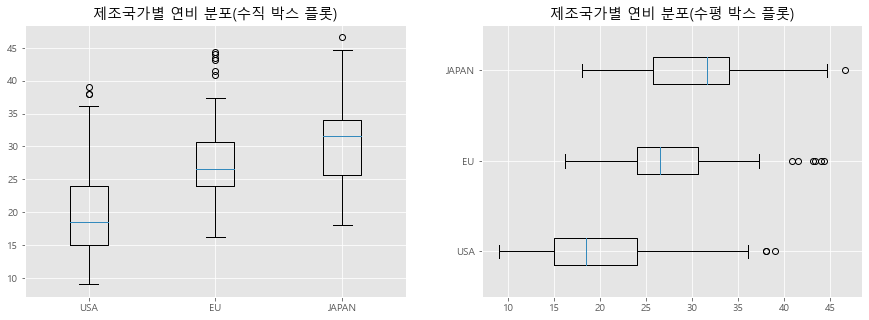

In [239]:
# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
    df[df['origin']==2]['mpg'],
    df[df['origin']==3]['mpg']],
    labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
    df[df['origin']==2]['mpg'],
    df[df['origin']==3]['mpg']],
    labels=['USA', 'EU', 'JAPAN'],
    vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()